In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [343]:
from sklearn.feature_selection import f_classif,chi2,VarianceThreshold,SelectKBest
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error,auc,roc_curve
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV,cross_val_score,train_test_split

In [344]:
import plotly as py 
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline(connected=True)
from plotly.offline import iplot

In [345]:
data = pd.read_csv('data.csv')

In [346]:
data.head()
pd.pandas.set_option('display.max_columns',None)

In [347]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [348]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [349]:
data.shape

(569, 33)

In [350]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [351]:
data['Unnamed: 32'].isnull().sum()/len(data.index)*100

100.0

In [352]:
data.drop(columns=['Unnamed: 32'],inplace=True)

In [353]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [354]:
round(data.describe(),1)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0
mean,30371831.4,14.1,19.3,92.0,654.9,0.1,0.1,0.1,0.0,0.2,0.1,0.4,1.2,2.9,40.3,0.0,0.0,0.0,0.0,0.0,0.0,16.3,25.7,107.3,880.6,0.1,0.3,0.3,0.1,0.3,0.1
std,125020585.6,3.5,4.3,24.3,351.9,0.0,0.1,0.1,0.0,0.0,0.0,0.3,0.6,2.0,45.5,0.0,0.0,0.0,0.0,0.0,0.0,4.8,6.1,33.6,569.4,0.0,0.2,0.2,0.1,0.1,0.0
min,8670.0,7.0,9.7,43.8,143.5,0.1,0.0,0.0,0.0,0.1,0.0,0.1,0.4,0.8,6.8,0.0,0.0,0.0,0.0,0.0,0.0,7.9,12.0,50.4,185.2,0.1,0.0,0.0,0.0,0.2,0.1
25%,869218.0,11.7,16.2,75.2,420.3,0.1,0.1,0.0,0.0,0.2,0.1,0.2,0.8,1.6,17.8,0.0,0.0,0.0,0.0,0.0,0.0,13.0,21.1,84.1,515.3,0.1,0.1,0.1,0.1,0.3,0.1
50%,906024.0,13.4,18.8,86.2,551.1,0.1,0.1,0.1,0.0,0.2,0.1,0.3,1.1,2.3,24.5,0.0,0.0,0.0,0.0,0.0,0.0,15.0,25.4,97.7,686.5,0.1,0.2,0.2,0.1,0.3,0.1
75%,8813129.0,15.8,21.8,104.1,782.7,0.1,0.1,0.1,0.1,0.2,0.1,0.5,1.5,3.4,45.2,0.0,0.0,0.0,0.0,0.0,0.0,18.8,29.7,125.4,1084.0,0.1,0.3,0.4,0.2,0.3,0.1
max,911320502.0,28.1,39.3,188.5,2501.0,0.2,0.3,0.4,0.2,0.3,0.1,2.9,4.9,22.0,542.2,0.0,0.1,0.4,0.1,0.1,0.0,36.0,49.5,251.2,4254.0,0.2,1.1,1.3,0.3,0.7,0.2


In [355]:
dataframe = pd.DataFrame({'Dtypes':data.dtypes,'Duplicated':data.duplicated().sum(),'uniques':data.nunique()})
dataframe

,Dtypes,Duplicated,uniques
id,int64,0,569
diagnosis,object,0,2
radius_mean,float64,0,456
texture_mean,float64,0,479
perimeter_mean,float64,0,522
area_mean,float64,0,539
smoothness_mean,float64,0,474
compactness_mean,float64,0,537
concavity_mean,float64,0,537
concave points_mean,float64,0,542


In [356]:
data.drop(columns=['id'],inplace=True)

### EDA

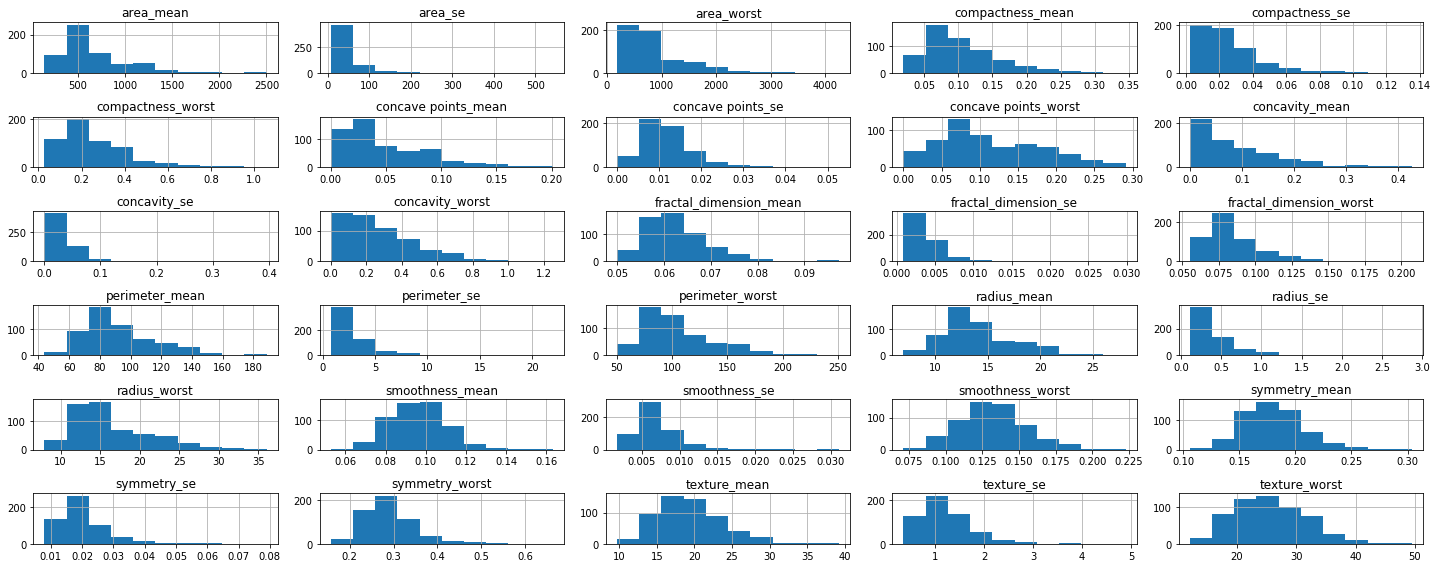

In [357]:
fig,ax = plt.subplots(figsize=(20,8))
data.hist(ax=ax)
plt.tight_layout()
plt.show()

In [358]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

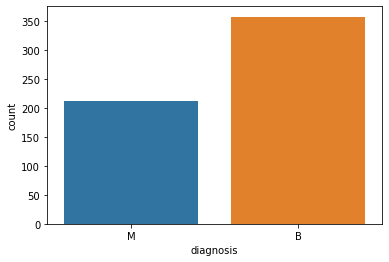

In [359]:
sns.countplot(data['diagnosis'])
plt.show()

In [360]:
df = data[data['diagnosis']=='M']

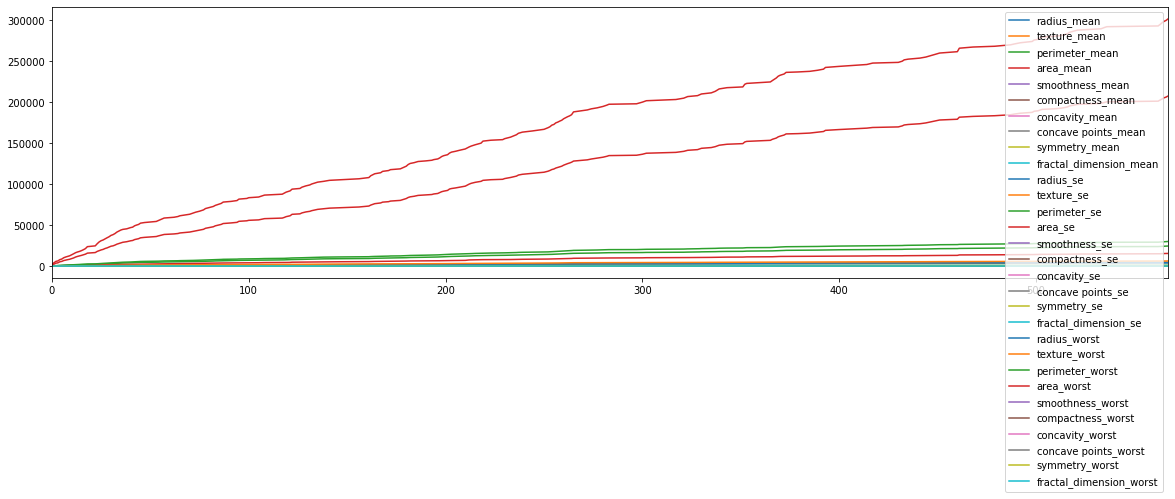

In [361]:
fig,ax=plt.subplots(figsize=(20,5))
df.cumsum().plot(ax=ax)
plt.show()

In [362]:
dff = data[data['diagnosis']=='B']

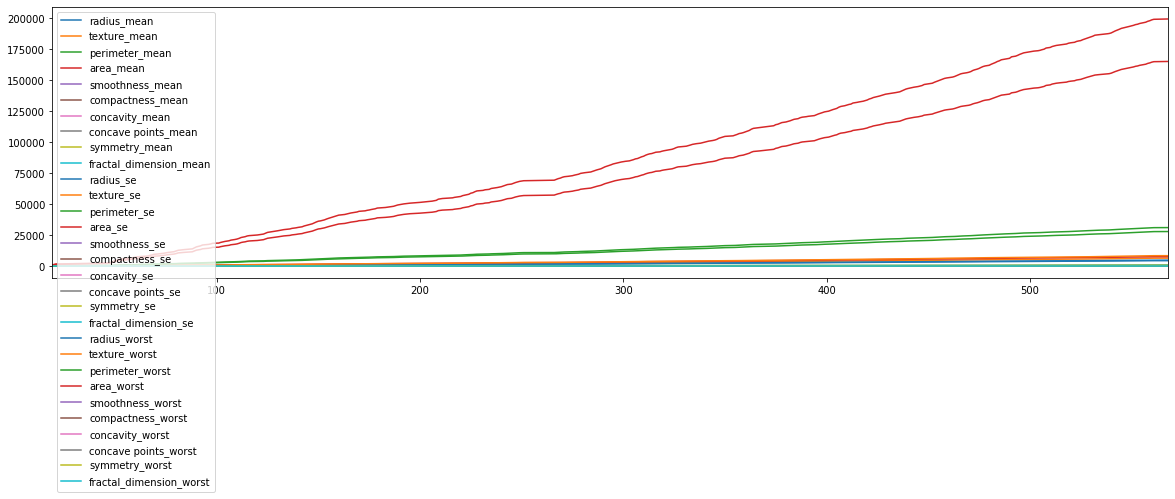

In [363]:
fig,ax=plt.subplots(figsize=(20,5))
dff.cumsum().plot(ax=ax)
plt.show()

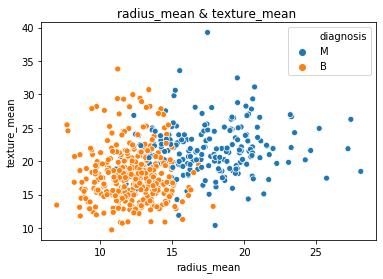

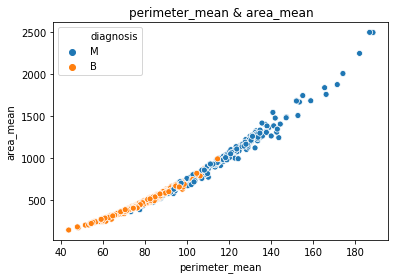

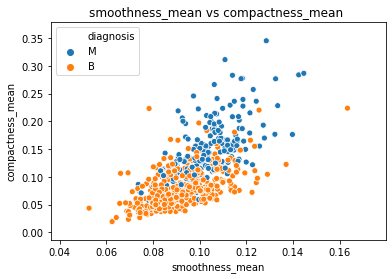

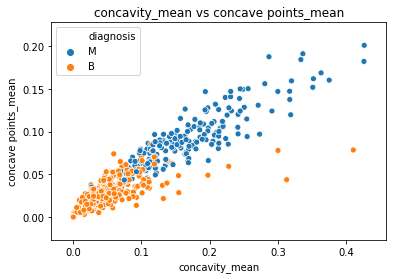

In [364]:
sns.scatterplot(x='radius_mean',y='texture_mean',data=data,hue='diagnosis')
plt.title('radius_mean & texture_mean ')
plt.show()
sns.scatterplot(x='perimeter_mean',y='area_mean',data=data,hue='diagnosis')
plt.title('perimeter_mean & area_mean')
plt.show()
sns.scatterplot(x='smoothness_mean',y='compactness_mean',data=data,hue='diagnosis')
plt.title('smoothness_mean vs compactness_mean ')          
plt.show()
sns.scatterplot(x='concavity_mean',y='concave points_mean',data=data,hue='diagnosis')
plt.title('concavity_mean vs concave points_mean')
plt.show()

In [365]:
len(data.columns)

31

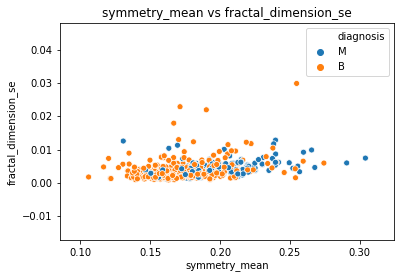

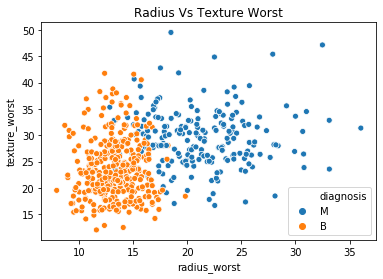

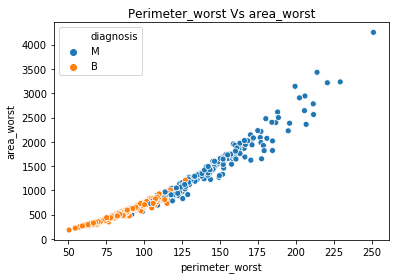

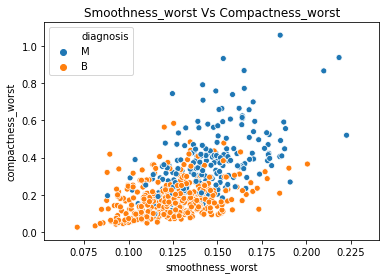

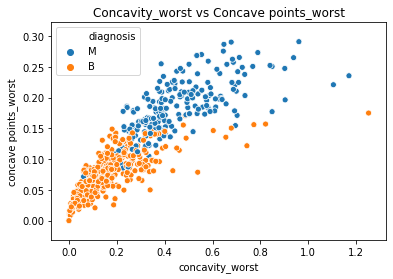

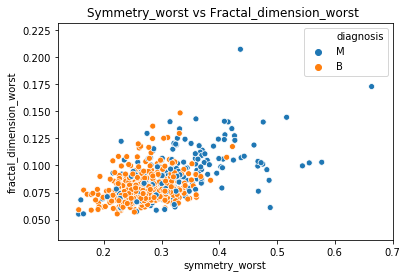

In [366]:
sns.scatterplot(data['symmetry_mean'],data['fractal_dimension_se'],hue=data['diagnosis'])
plt.title('symmetry_mean vs fractal_dimension_se')
plt.show()
sns.scatterplot(data['radius_worst'],data['texture_worst'],hue=data['diagnosis'])
plt.title('Radius Vs Texture Worst')
plt.show()
sns.scatterplot(data['perimeter_worst'],data['area_worst'],hue=data['diagnosis'])
plt.title('Perimeter_worst Vs area_worst')
plt.show()
sns.scatterplot(data['smoothness_worst'],data['compactness_worst'],hue=data['diagnosis'])
plt.title('Smoothness_worst Vs Compactness_worst')
plt.show()
sns.scatterplot(data['concavity_worst'],data['concave points_worst'],hue=data['diagnosis'])
plt.title('Concavity_worst vs Concave points_worst')
plt.show()
sns.scatterplot(data['symmetry_worst'],data['fractal_dimension_worst'],hue=data['diagnosis'])
plt.title('Symmetry_worst vs Fractal_dimension_worst ')
plt.show()

## DataPreprocessing and Feature Engineering.

In [367]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [368]:
gi= dict(B=0,M=1)
gi

{'B': 0, 'M': 1}

In [369]:
data['diagnosis'] = data['diagnosis'].map(gi)

In [370]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [371]:
x = data.drop(columns=['diagnosis'])
y = data['diagnosis']

In [372]:
x.shape,y.shape

((569, 30), (569,))

In [373]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,stratify=y,train_size=.80)

In [374]:
x_train.shape,x_test.shape

((455, 30), (114, 30))

In [375]:
f_score,p_values= f_classif(x_train,y_train)

In [376]:
P_values = pd.Series(p_values,index=x_train.columns)

In [377]:
P_values.sort_values(ascending=False,inplace=True)

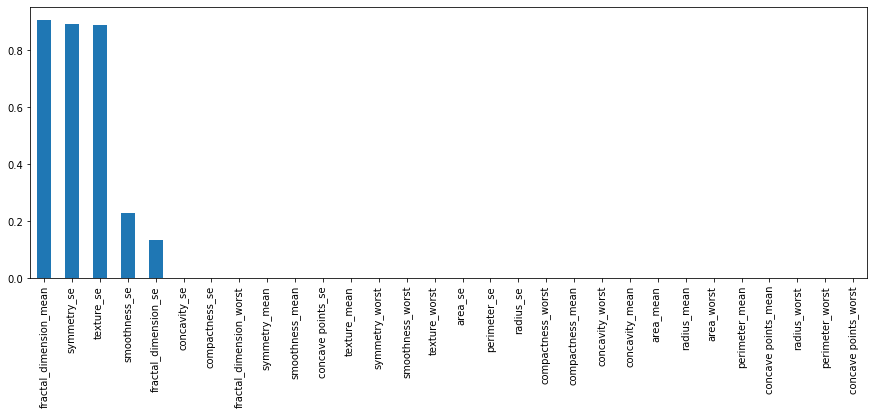

In [378]:
fig,ax=plt.subplots(figsize=(15,5))
P_values.plot(kind='bar',ax=ax)
plt.show()

In [379]:
sel = SelectKBest(f_classif,k=15)

In [380]:
sel.fit(x_train,y_train)

SelectKBest(k=15, score_func=<function f_classif at 0x0D564030>)

In [381]:
feature = x_train.columns[sel.get_support()]
feature

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')

In [382]:
X_train = sel.transform(x_train)
X_test  = sel.transform(x_test)

In [383]:
X_train.shape,X_test.shape

((455, 15), (114, 15))

In [384]:
scaler = StandardScaler()
X_train_scalled = scaler.fit_transform(X_train)
X_test_scalled  = scaler.transform(X_test)

In [385]:
var = VarianceThreshold(threshold=0.01)
x_train_unique = var.fit_transform(X_train_scalled)
x_test_unique  = var.transform(X_test_scalled)

In [386]:
x_test_unique.shape,x_train_unique.shape

((114, 15), (455, 15))

In [387]:
x_train_T = pd.DataFrame(x_train_unique).T

In [388]:
dupliacated = x_train_T.duplicated().sum()
dupliacated

0

In [389]:
X_train_scalled = pd.DataFrame(X_train_scalled,columns=feature)

In [390]:
corrmat = X_train_scalled.corr()
corrmat

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
radius_mean,1.000000,0.997815,0.986740,0.526901,0.676323,0.826984,0.678727,0.674580,0.729469,0.969256,0.964439,0.940515,0.417638,0.515938,0.741073
perimeter_mean,0.997815,1.000000,0.985960,0.577536,0.716044,0.855414,0.692054,0.694109,0.739116,0.969332,0.970006,0.941085,0.460088,0.553325,0.768021
area_mean,0.986740,0.985960,1.000000,0.518185,0.685587,0.827092,0.731883,0.726519,0.795706,0.960725,0.956714,0.958177,0.393840,0.501422,0.717781
compactness_mean,0.526901,0.577536,0.518185,1.000000,0.892790,0.845809,0.513541,0.564665,0.466179,0.559706,0.615411,0.530403,0.867360,0.820215,0.828208
concavity_mean,0.676323,0.716044,0.685587,0.892790,1.000000,0.920598,0.631220,0.658933,0.613761,0.688777,0.731725,0.675319,0.759892,0.878816,0.857881
concave points_mean,0.826984,0.855414,0.827092,0.845809,0.920598,1.000000,0.697586,0.708650,0.685837,0.838067,0.864362,0.815747,0.676361,0.746509,0.912250
radius_se,0.678727,0.692054,0.731883,0.513541,0.631220,0.697586,1.000000,0.974705,0.951558,0.710474,0.715914,0.746441,0.291784,0.369483,0.521539
perimeter_se,0.674580,0.694109,0.726519,0.564665,0.658933,0.708650,0.974705,1.000000,0.939162,0.693827,0.717462,0.726527,0.347751,0.410185,0.543718
area_se,0.729469,0.739116,0.795706,0.466179,0.613761,0.685837,0.951558,0.939162,1.000000,0.746652,0.751104,0.803123,0.280471,0.369814,0.523866
radius_worst,0.969256,0.969332,0.960725,0.559706,0.688777,0.838067,0.710474,0.693827,0.746652,1.000000,0.993719,0.983107,0.482331,0.564423,0.787465


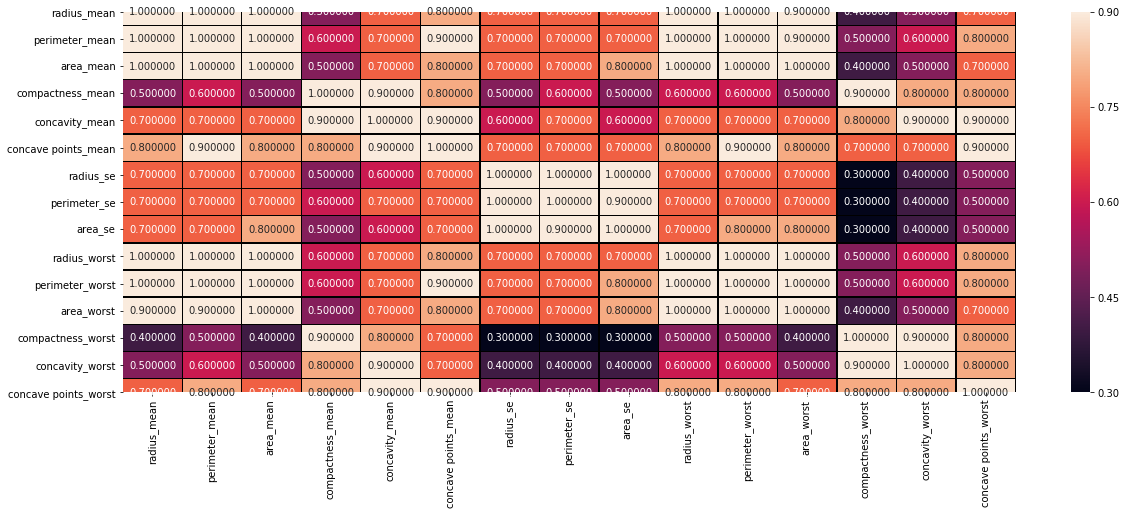

In [391]:
fig,ax = plt.subplots(figsize=(20,7))
sns.heatmap(round(corrmat,1),annot=True,vmax=0.9,fmt='f',linecolor='black',linewidths=0.4,ax=ax)
plt.show()

In [392]:
def corrdata(data,theshold):
    cormat = data.corr()
    corrcol = set()
    
    for i in range(len(cormat.columns)):
        for j in range(i):
            if abs(cormat.iloc[i,j])>theshold:
                columns = corrmat.columns[i]
                corrcol.add(columns)
    return corrcol

In [393]:
features= corrdata(X_train_scalled,0.96)
features

{'area_mean',
 'area_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst'}

In [394]:
X_train_uncorr = X_train_scalled.drop(columns=features)

In [395]:
X_test_scalled = pd.DataFrame(X_test_scalled,columns=feature)

In [396]:
X_test_uncorr  = X_test_scalled.drop(columns=features)

In [397]:
X_train_uncorr.shape,X_test_uncorr.shape

((455, 9), (114, 9))

<Figure size 1440x504 with 0 Axes>

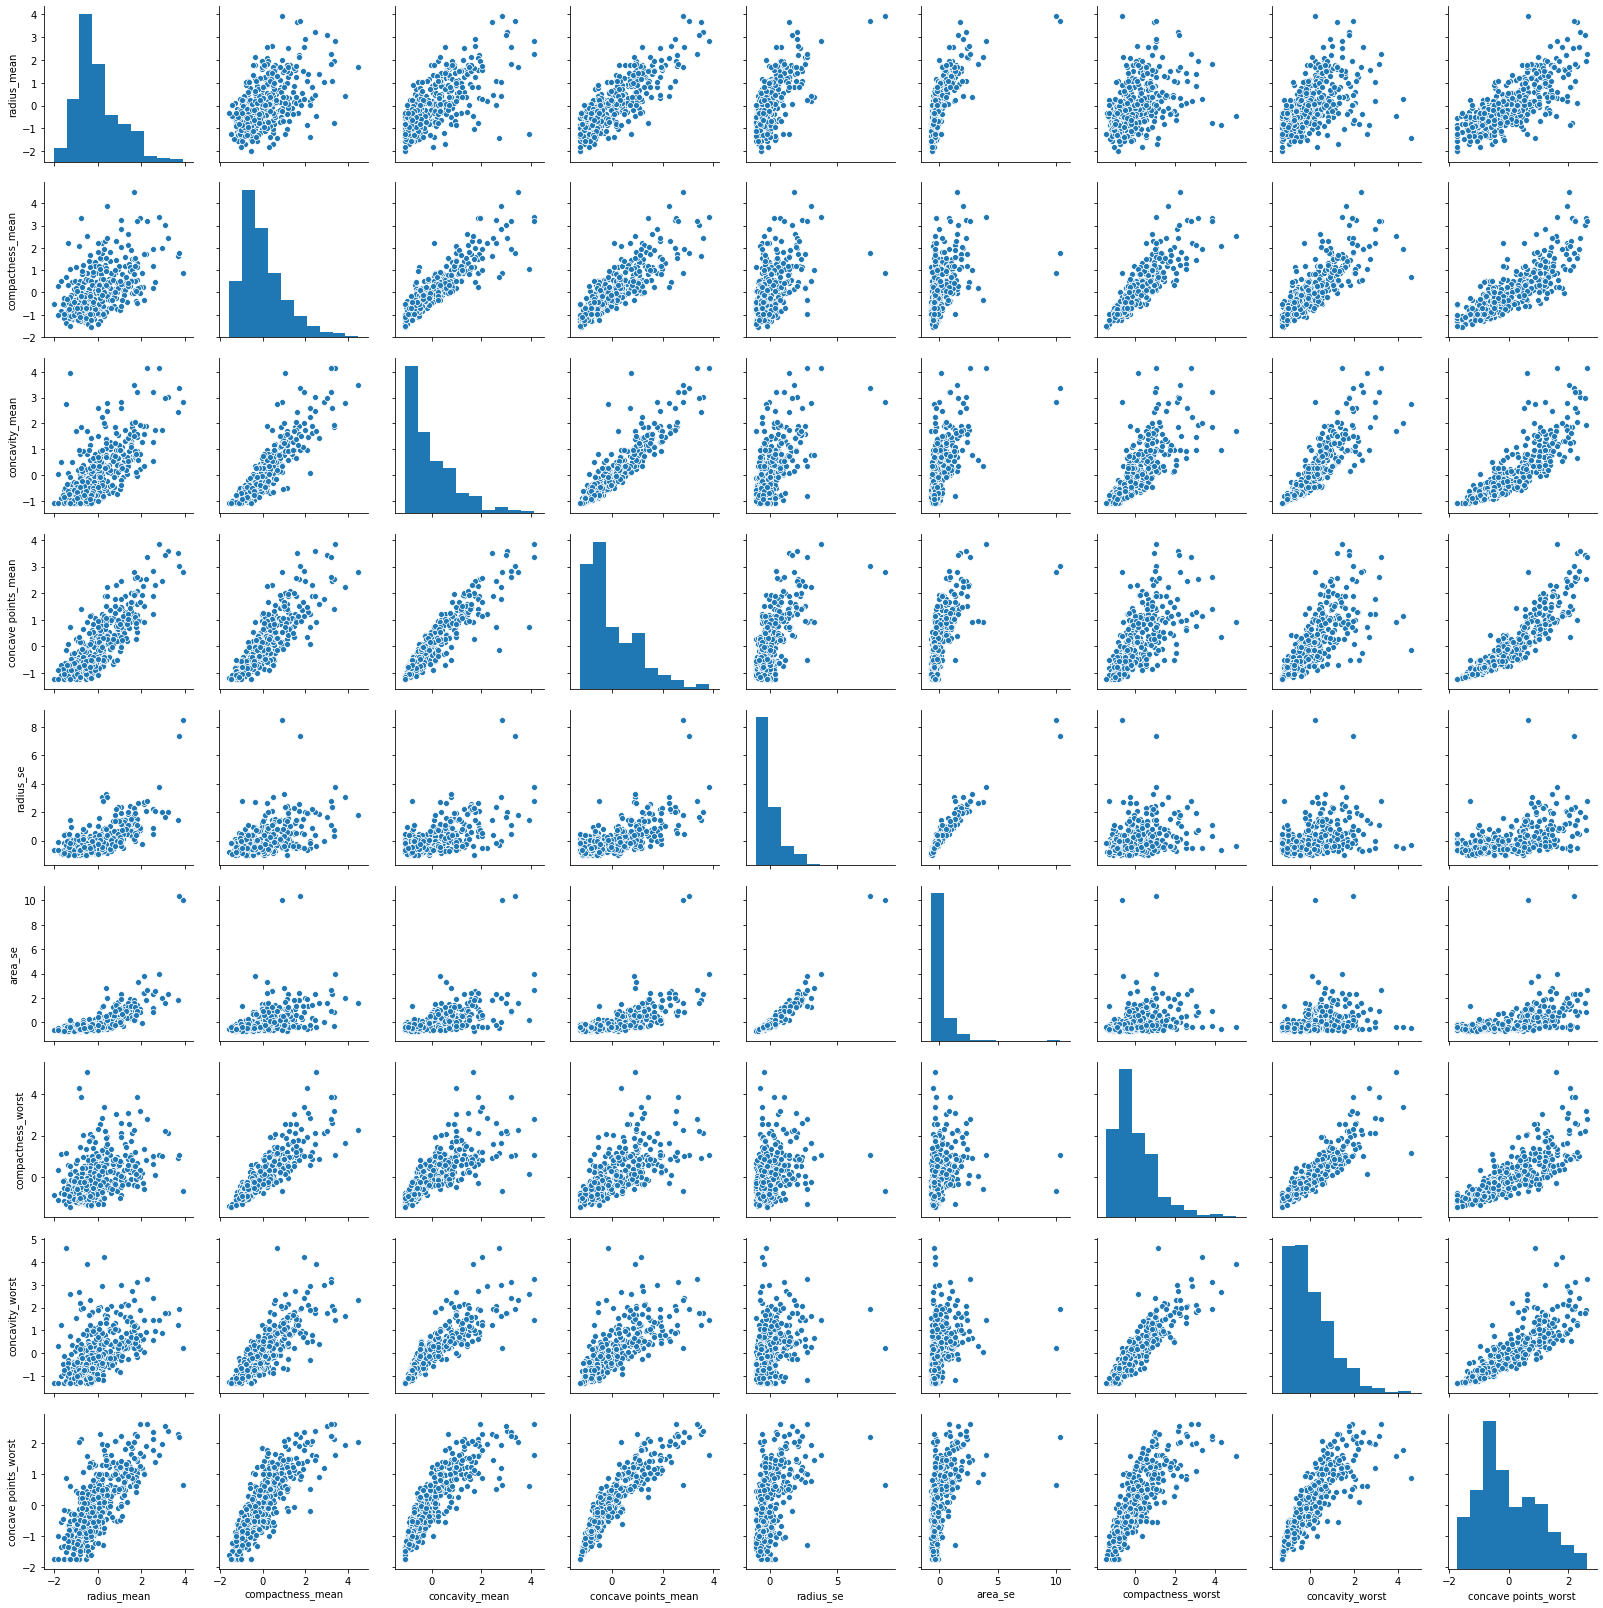

In [398]:
plt.figure(figsize=(20,7))
sns.pairplot(X_train_uncorr)
plt.show()

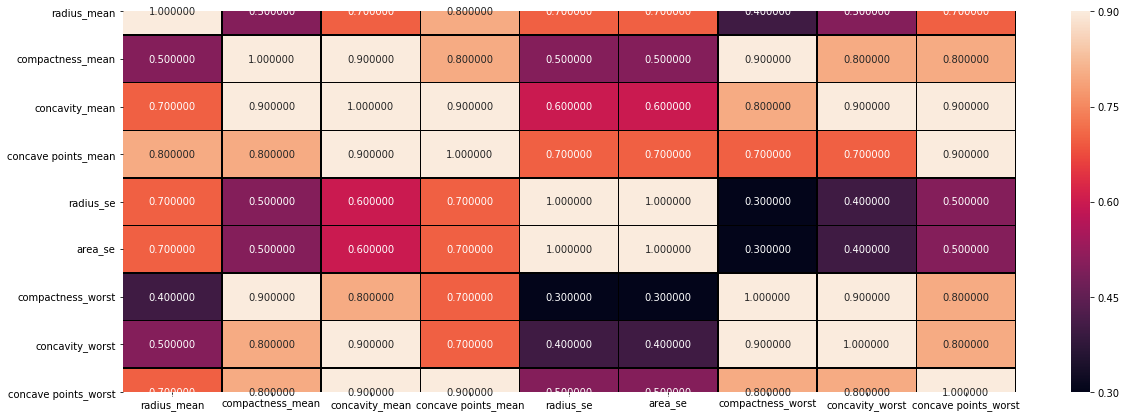

In [399]:
fig,ax = plt.subplots(figsize=(20,7))
sns.heatmap(round(X_train_uncorr.corr(),1),annot=True,vmax=0.9,fmt='f',linecolor='black',linewidths=0.4,ax=ax)
plt.show()

## Imbalacement Remove

In [400]:
print('Y_train with 0',len(y_train[y_train==0]))
print('Y_train with 0',len(y_train[y_train==1]))

Y_train with 0 285
Y_train with 0 170


In [401]:
from imblearn.over_sampling import SMOTE

In [402]:
sm = SMOTE(sampling_strategy=1,random_state=42,k_neighbors=5)

In [403]:
x_train_res,y_train_res = sm.fit_sample(X_train_uncorr,y_train)

In [404]:
print('Y_train_res with 0',len(y_train_res[y_train_res==0]))
print('Y_train_res with 0',len(y_train_res[y_train_res==1]))

Y_train_res with 0 285
Y_train_res with 0 285


## Prepare the Model.

### 1.Ensemble learning Techniques Model.

**RandomForestClassifier**

In [405]:
estimator = RandomForestClassifier()

In [406]:
from scipy.stats import randint

In [407]:
dictionary = {'criterion':['gini','entropy'],'n_estimators':[100,200,None],'min_samples_leaf':randint(1,5)}

In [408]:
cvP_clf = RandomizedSearchCV(estimator,dictionary,cv=10)

In [409]:
cvP_clf.fit(x_train_res,y_train_res)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [410]:
cvP_clf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [411]:
cvP_clf.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 2, 'n_estimators': 200}

In [412]:
cvP_clf.best_score_

0.9526315789473685

In [413]:
y_predict = cvP_clf.predict(X_test_uncorr)
y_predict

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1], dtype=int64)

In [414]:
mat = confusion_matrix(y_test,y_predict)
mat

array([[71,  1],
       [ 3, 39]], dtype=int64)

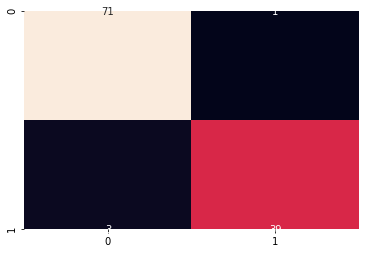

In [415]:
sns.heatmap(mat,annot=True,fmt='d',cbar=False)
plt.show()

In [416]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



####  Calculate The Cross-Validation Score

In [417]:
print('Accuarcy Based on the train_data :-',cvP_clf.score(x_train_res,y_train_res))
print('Accuarcy Based on the testing_data :-',cvP_clf.score(X_test_uncorr,y_test))

Accuarcy Based on the train_data :- 1.0
Accuarcy Based on the testing_data :- 0.9649122807017544


In [418]:
cv_score = cross_val_score(RandomForestClassifier(criterion='gini',min_samples_leaf=1,n_estimators=200),x_train_res,y_train_res).mean()*100

In [419]:
cv_score

95.08771929824562

### Auc-Roc Curve

In [420]:
probes = cvP_clf.predict_proba(X_test_uncorr)[:,1]

In [421]:
fpr,tpr,thresh=roc_curve(y_test,probes)

In [422]:
roc_data = pd.DataFrame(dict(fpr=fpr,tpr=tpr))

In [423]:
auc = auc(fpr,tpr)

In [424]:
from plotnine import ggplot,aes,geom_abline,ggtitle,geom_area,geom_line

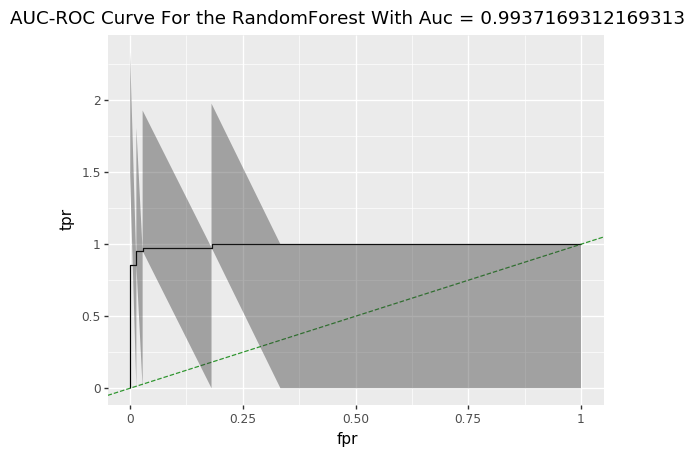

<ggplot: (49853493)>

In [425]:
ggplot(roc_data,aes(x='fpr',y='tpr'))+geom_line()+geom_abline(linetype='dashed',color='green',alpha=0.8)+geom_area(alpha=0.4)+ggtitle('AUC-ROC Curve For the RandomForest With Auc = {}'.format(auc))

### SVM (Support Vector Machine)

In [432]:
svm = SVC(C=0.1,kernel='sigmoid',max_iter=200,random_state=42)

In [433]:
svm.fit(x_train_res,y_train_res)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=200, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [434]:
y_predict = svm.predict(X_test_uncorr)

In [435]:
print('Accuaracy :-',accuracy_score(y_test,y_predict))

Accuaracy :- 0.9473684210526315


In [436]:
print('Accuarcy Based on the train_data :-',svm.score(x_train_res,y_train_res))
print('Accuarcy Based on the testing_data :-',svm.score(X_test_uncorr,y_test))

Accuarcy Based on the train_data :- 0.9228070175438596
Accuarcy Based on the testing_data :- 0.9473684210526315


In [439]:
cv_score = cross_val_score(SVC(),x_train_res,y_train_res).mean()*100

In [440]:
cv_score

93.50877192982455

In [445]:
mat = confusion_matrix(y_test,y_predict)
mat

array([[71,  1],
       [ 5, 37]], dtype=int64)

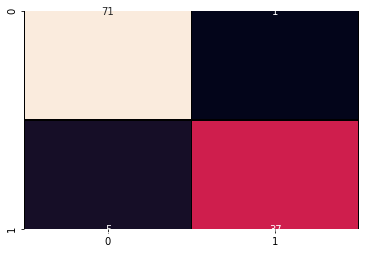

In [454]:
sns.heatmap(mat,annot=True,fmt='d',linecolor='black',linewidths=0.4,cbar=False)
plt.show()

In [456]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

